In [2]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read Raw Dataset
df = pd.read_excel('raw_data.xlsx')

In [4]:
df.head()

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,NaN,NaN,UMLS:C0392680_shortness of breath
2,NaN,NaN,UMLS:C0012833_dizziness
3,NaN,NaN,UMLS:C0004093_asthenia
4,NaN,NaN,UMLS:C0085639_fall


In [5]:
# Fill all NaN with the values above
data = df.fillna(method='ffill')

In [6]:
data.head()

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0392680_shortness of breath
2,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0012833_dizziness
3,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0004093_asthenia
4,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0085639_fall


In [7]:
# Process Disease and Symptom Names
def process_data(data):
    data_list = []
    data_name = data.replace('^','_').split('_')
    n = 1
    for names in data_name:
        if (n % 2 == 0):
            data_list.append(names)
        n += 1
    return data_list

In [8]:
# Data Cleanup
disease_list = []
disease_symptom_dict = defaultdict(list)
disease_symptom_count = {}
count = 0

for idx, row in data.iterrows():

    # Get the Disease Names
    if (row['Disease'] !="\xc2\xa0") and (row['Disease'] != ""):
        disease = row['Disease']
        disease_list = process_data(data=disease)
        count = row['Count of Disease Occurrence']

    # Get the Symptoms Corresponding to Diseases
    if (row['Symptom'] !="\xc2\xa0") and (row['Symptom'] != ""):
        symptom = row['Symptom']
        symptom_list = process_data(data=symptom)
        for d in disease_list:
            for s in symptom_list:
                disease_symptom_dict[d].append(s)
            disease_symptom_count[d] = count

In [9]:
# See that the data is Processed Correctly
disease_symptom_dict

defaultdict(list,
            {'hypertensive disease': ['pain chest',
              'shortness of breath',
              'dizziness',
              'asthenia',
              'fall',
              'syncope',
              'vertigo',
              'sweat',
              'sweating increased',
              'palpitation',
              'nausea',
              'angina pectoris',
              'pressure chest'],
             'diabetes': ['polyuria',
              'polydypsia',
              'shortness of breath',
              'pain chest',
              'asthenia',
              'nausea',
              'orthopnea',
              'rale',
              'sweat',
              'sweating increased',
              'unresponsiveness',
              'mental status changes',
              'vertigo',
              'vomiting',
              'labored breathing'],
             'depression mental': ['feeling suicidal',
              'suicidal',
              'hallucinations auditory',
              'feel

In [10]:
# Count of Disease Occurence w.r.t each Disease
disease_symptom_count

{'hypertensive disease': 3363.0,
 'diabetes': 1421.0,
 'depression mental': 1337.0,
 'depressive disorder': 1337.0,
 'coronary arteriosclerosis': 1284.0,
 'coronary heart disease': 1284.0,
 'pneumonia': 1029.0,
 'failure heart congestive': 963.0,
 'accident\xa0cerebrovascular': 885.0,
 'asthma': 835.0,
 'myocardial infarction': 759.0,
 'hypercholesterolemia': 685.0,
 'infection': 630.0,
 'infection urinary tract': 597.0,
 'anemia': 544.0,
 'chronic obstructive airway disease': 524.0,
 'dementia': 504.0,
 'insufficiency renal': 445.0,
 'confusion': 408.0,
 'degenerative\xa0polyarthritis': 405.0,
 'hypothyroidism': 398.0,
 'anxiety state': 390.0,
 'malignant neoplasms': 354.0,
 'primary malignant neoplasm': 354.0,
 'acquired\xa0immuno-deficiency syndrome': 350.0,
 'HIV': 350.0,
 'hiv infections': 350.0,
 'cellulitis': 341.0,
 'gastroesophageal reflux disease': 325.0,
 'septicemia': 311.0,
 'systemic infection': 311.0,
 'sepsis (invertebrate)': 311.0,
 'deep vein thrombosis': 310.0,
 'deh

In [11]:
# Save cleaned data as CSV
f = open('cleaned_data.xlsx', 'w')

with f:
    writer = csv.writer(f)
    for key, val in disease_symptom_dict.items():
        for i in range(len(val)):
            writer.writerow([key, val[i], disease_symptom_count[key]])

In [12]:
# Remove any rows with empty values
df.replace(float('nan'), np.nan, inplace=True)
df.dropna(inplace=True)

In [13]:
from sklearn import preprocessing

In [14]:
n_unique = len(df['Symptom'].unique())
n_unique

79

In [15]:
df.dtypes

Disease                         object
Count of Disease Occurrence    float64
Symptom                         object
dtype: object

In [16]:
# Encode the Labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['Symptom'])
print(integer_encoded)

[ 4 27 61  4  7 60 13 34  4 25 16 16 35 60 16 60 29 25 60 49 25 16 32 25
 16 30 16 67 60 29 60 33 67  2 60 62  4 61 25 12  2 16 72 21 60 25  7 13
 57 52 67 50 33 41 37  0 18 36 25 43 23 50  0 28  0 25 70 16 37 75 37  7
  2 60 26 68 15 55 58 16 76 50 64 48 78 42 51 56 60 10  9  3 60 47 38 40
 42 27 11 44 19 67  0 42 63 24 67 65 20 60  6 71 16  5 46 31 14 77 74  8
 56 69 39 73  0  1 22 33 53 66 17 54 59 45]


In [17]:
# One Hot Encode the Labels
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
onehot_encoded[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
len(onehot_encoded[0])

79

In [20]:
cols = np.asarray(df['Symptom'].unique())
cols

array(['UMLS:C0008031_pain chest', 'UMLS:C0032617_polyuria',
       'UMLS:C0424000_feeling suicidal', 'UMLS:C0010200_cough',
       'UMLS:C0392680_shortness of breath', 'UMLS:C0013362_dysarthria',
       'UMLS:C0043144_wheezing', 'UMLS:C0030193_pain',
       'UMLS:C0015967_fever', 'UMLS:C0085593_chill',
       'UMLS:C0036572_seizure', 'UMLS:C0233481_worry',
       'UMLS:C0041834_erythema', 'UMLS:C0038999_swelling',
       'UMLS:C0577559_mass of body structure', 'UMLS:C0042963_vomiting',
       'UMLS:C0003962_ascites', 'UMLS:C0438696_suicidal',
       'UMLS:C0013144_drowsiness^UMLS:C0234450_sleepy',
       'UMLS:C0856054_mental status changes',
       'UMLS:C0020461_hyperkalemia', 'UMLS:C0242453_prostatism',
       'UMLS:C0234518_speech slurred',
       'UMLS:C0233762_hallucinations auditory',
       'UMLS:C0221166_paraparesis', 'UMLS:C0085619_orthopnea',
       'UMLS:C0000737_pain abdominal', 'UMLS:C0018965_hematuria',
       'UMLS:C0085606_urgency of\xa0micturition',
       'UMLS:C023

In [22]:
# Create a new dataframe to save OHE labels
df_ohe = pd.DataFrame(columns = cols)
df_ohe.head()

,UMLS:C0008031_pain chest,UMLS:C0032617_polyuria,UMLS:C0424000_feeling suicidal,UMLS:C0010200_cough,UMLS:C0392680_shortness of breath,UMLS:C0013362_dysarthria,UMLS:C0043144_wheezing,UMLS:C0030193_pain,UMLS:C0015967_fever,UMLS:C0085593_chill,...,UMLS:C0086439_hypokinesia,UMLS:C0859032_moan,UMLS:C0002416_ambidexterity,UMLS:C0020639_hypoproteinemia,UMLS:C0238705_left atrial hypertrophy,UMLS:C0549483_abscess bacterial,UMLS:C0016204_flatulence,UMLS:C0240233_loose associations,UMLS:C0277794_extreme exhaustion,UMLS:C0232257_systolic murmur


In [23]:
for i in range(len(onehot_encoded)):
    df_ohe.loc[i] = onehot_encoded[i]

In [24]:
df_ohe.head()

,UMLS:C0008031_pain chest,UMLS:C0032617_polyuria,UMLS:C0424000_feeling suicidal,UMLS:C0010200_cough,UMLS:C0392680_shortness of breath,UMLS:C0013362_dysarthria,UMLS:C0043144_wheezing,UMLS:C0030193_pain,UMLS:C0015967_fever,UMLS:C0085593_chill,...,UMLS:C0086439_hypokinesia,UMLS:C0859032_moan,UMLS:C0002416_ambidexterity,UMLS:C0020639_hypoproteinemia,UMLS:C0238705_left atrial hypertrophy,UMLS:C0549483_abscess bacterial,UMLS:C0016204_flatulence,UMLS:C0240233_loose associations,UMLS:C0277794_extreme exhaustion,UMLS:C0232257_systolic murmur
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
len(df_ohe)

134

In [26]:
# Disease Dataframe
df_disease = df['Disease']
df_disease.head()

0                    UMLS:C0020538_hypertensive disease
12                               UMLS:C0011847_diabetes
26    UMLS:C0011570_depression mental^UMLS:C0011581_...
47    UMLS:C0010054_coronary arteriosclerosis^UMLS:C...
56                              UMLS:C0032285_pneumonia
Name: Disease, dtype: object

In [27]:
# Concatenate OHE Labels with the Disease Column
df_concat = pd.concat([df_disease,df_ohe], axis=1)
df_concat.head()

,Disease,UMLS:C0008031_pain chest,UMLS:C0032617_polyuria,UMLS:C0424000_feeling suicidal,UMLS:C0010200_cough,UMLS:C0392680_shortness of breath,UMLS:C0013362_dysarthria,UMLS:C0043144_wheezing,UMLS:C0030193_pain,UMLS:C0015967_fever,...,UMLS:C0086439_hypokinesia,UMLS:C0859032_moan,UMLS:C0002416_ambidexterity,UMLS:C0020639_hypoproteinemia,UMLS:C0238705_left atrial hypertrophy,UMLS:C0549483_abscess bacterial,UMLS:C0016204_flatulence,UMLS:C0240233_loose associations,UMLS:C0277794_extreme exhaustion,UMLS:C0232257_systolic murmur
0,UMLS:C0020538_hypertensive disease,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,UMLS:C0011847_diabetes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,UMLS:C0011570_depression mental^UMLS:C0011581_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,UMLS:C0010054_coronary arteriosclerosis^UMLS:C...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,UMLS:C0032285_pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_concat.drop_duplicates(keep='first',inplace=True)

In [29]:
df_concat.head()

,Disease,UMLS:C0008031_pain chest,UMLS:C0032617_polyuria,UMLS:C0424000_feeling suicidal,UMLS:C0010200_cough,UMLS:C0392680_shortness of breath,UMLS:C0013362_dysarthria,UMLS:C0043144_wheezing,UMLS:C0030193_pain,UMLS:C0015967_fever,...,UMLS:C0086439_hypokinesia,UMLS:C0859032_moan,UMLS:C0002416_ambidexterity,UMLS:C0020639_hypoproteinemia,UMLS:C0238705_left atrial hypertrophy,UMLS:C0549483_abscess bacterial,UMLS:C0016204_flatulence,UMLS:C0240233_loose associations,UMLS:C0277794_extreme exhaustion,UMLS:C0232257_systolic murmur
0,UMLS:C0020538_hypertensive disease,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,UMLS:C0011847_diabetes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,UMLS:C0011570_depression mental^UMLS:C0011581_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,UMLS:C0010054_coronary arteriosclerosis^UMLS:C...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,UMLS:C0032285_pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
len(df_concat)

205

In [31]:
cols = cols[1:]

In [32]:
# Since, every disease has multiple symptoms, combine all symptoms per disease per row
df_concat = df_concat.groupby('Disease').sum()
df_concat = df_concat.reset_index()
df_concat[:5]

,Disease,UMLS:C0008031_pain chest,UMLS:C0032617_polyuria,UMLS:C0424000_feeling suicidal,UMLS:C0010200_cough,UMLS:C0392680_shortness of breath,UMLS:C0013362_dysarthria,UMLS:C0043144_wheezing,UMLS:C0030193_pain,UMLS:C0015967_fever,...,UMLS:C0086439_hypokinesia,UMLS:C0859032_moan,UMLS:C0002416_ambidexterity,UMLS:C0020639_hypoproteinemia,UMLS:C0238705_left atrial hypertrophy,UMLS:C0549483_abscess bacterial,UMLS:C0016204_flatulence,UMLS:C0240233_loose associations,UMLS:C0277794_extreme exhaustion,UMLS:C0232257_systolic murmur
0,UMLS:C0001175_acquired immuno-deficiency syndr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,UMLS:C0001418_adenocarcinoma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,UMLS:C0001511_adhesion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,UMLS:C0001973_chronic alcoholic intoxication,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,UMLS:C0002395_Alzheimer's disease,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
len(df_concat)

134

In [34]:
df_concat.to_csv("training_dataset.csv", index=False)

In [35]:
# One Hot Encoded Features
X = df_concat[cols]

# Labels
y = df_concat['Disease']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [37]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [38]:
len(X_train), len(y_train)

(107, 107)

In [39]:
len(X_test), len(y_test)

(27, 27)

In [40]:
dt = DecisionTreeClassifier()
clf_dt=dt.fit(X, y)

In [41]:
clf_dt.score(X, y)

0.08955223880597014

In [42]:
export_graphviz(dt,
                out_file='./tree.dot',
                feature_names=cols)

In [43]:
!pip install graphviz

In [44]:
from graphviz import Source
from sklearn import tree

graph = Source(export_graphviz(dt,
                out_file=None,
                feature_names=cols))

png_bytes = graph.pipe(format='png')

with open('tree.png','wb') as f:
    f.write(png_bytes)


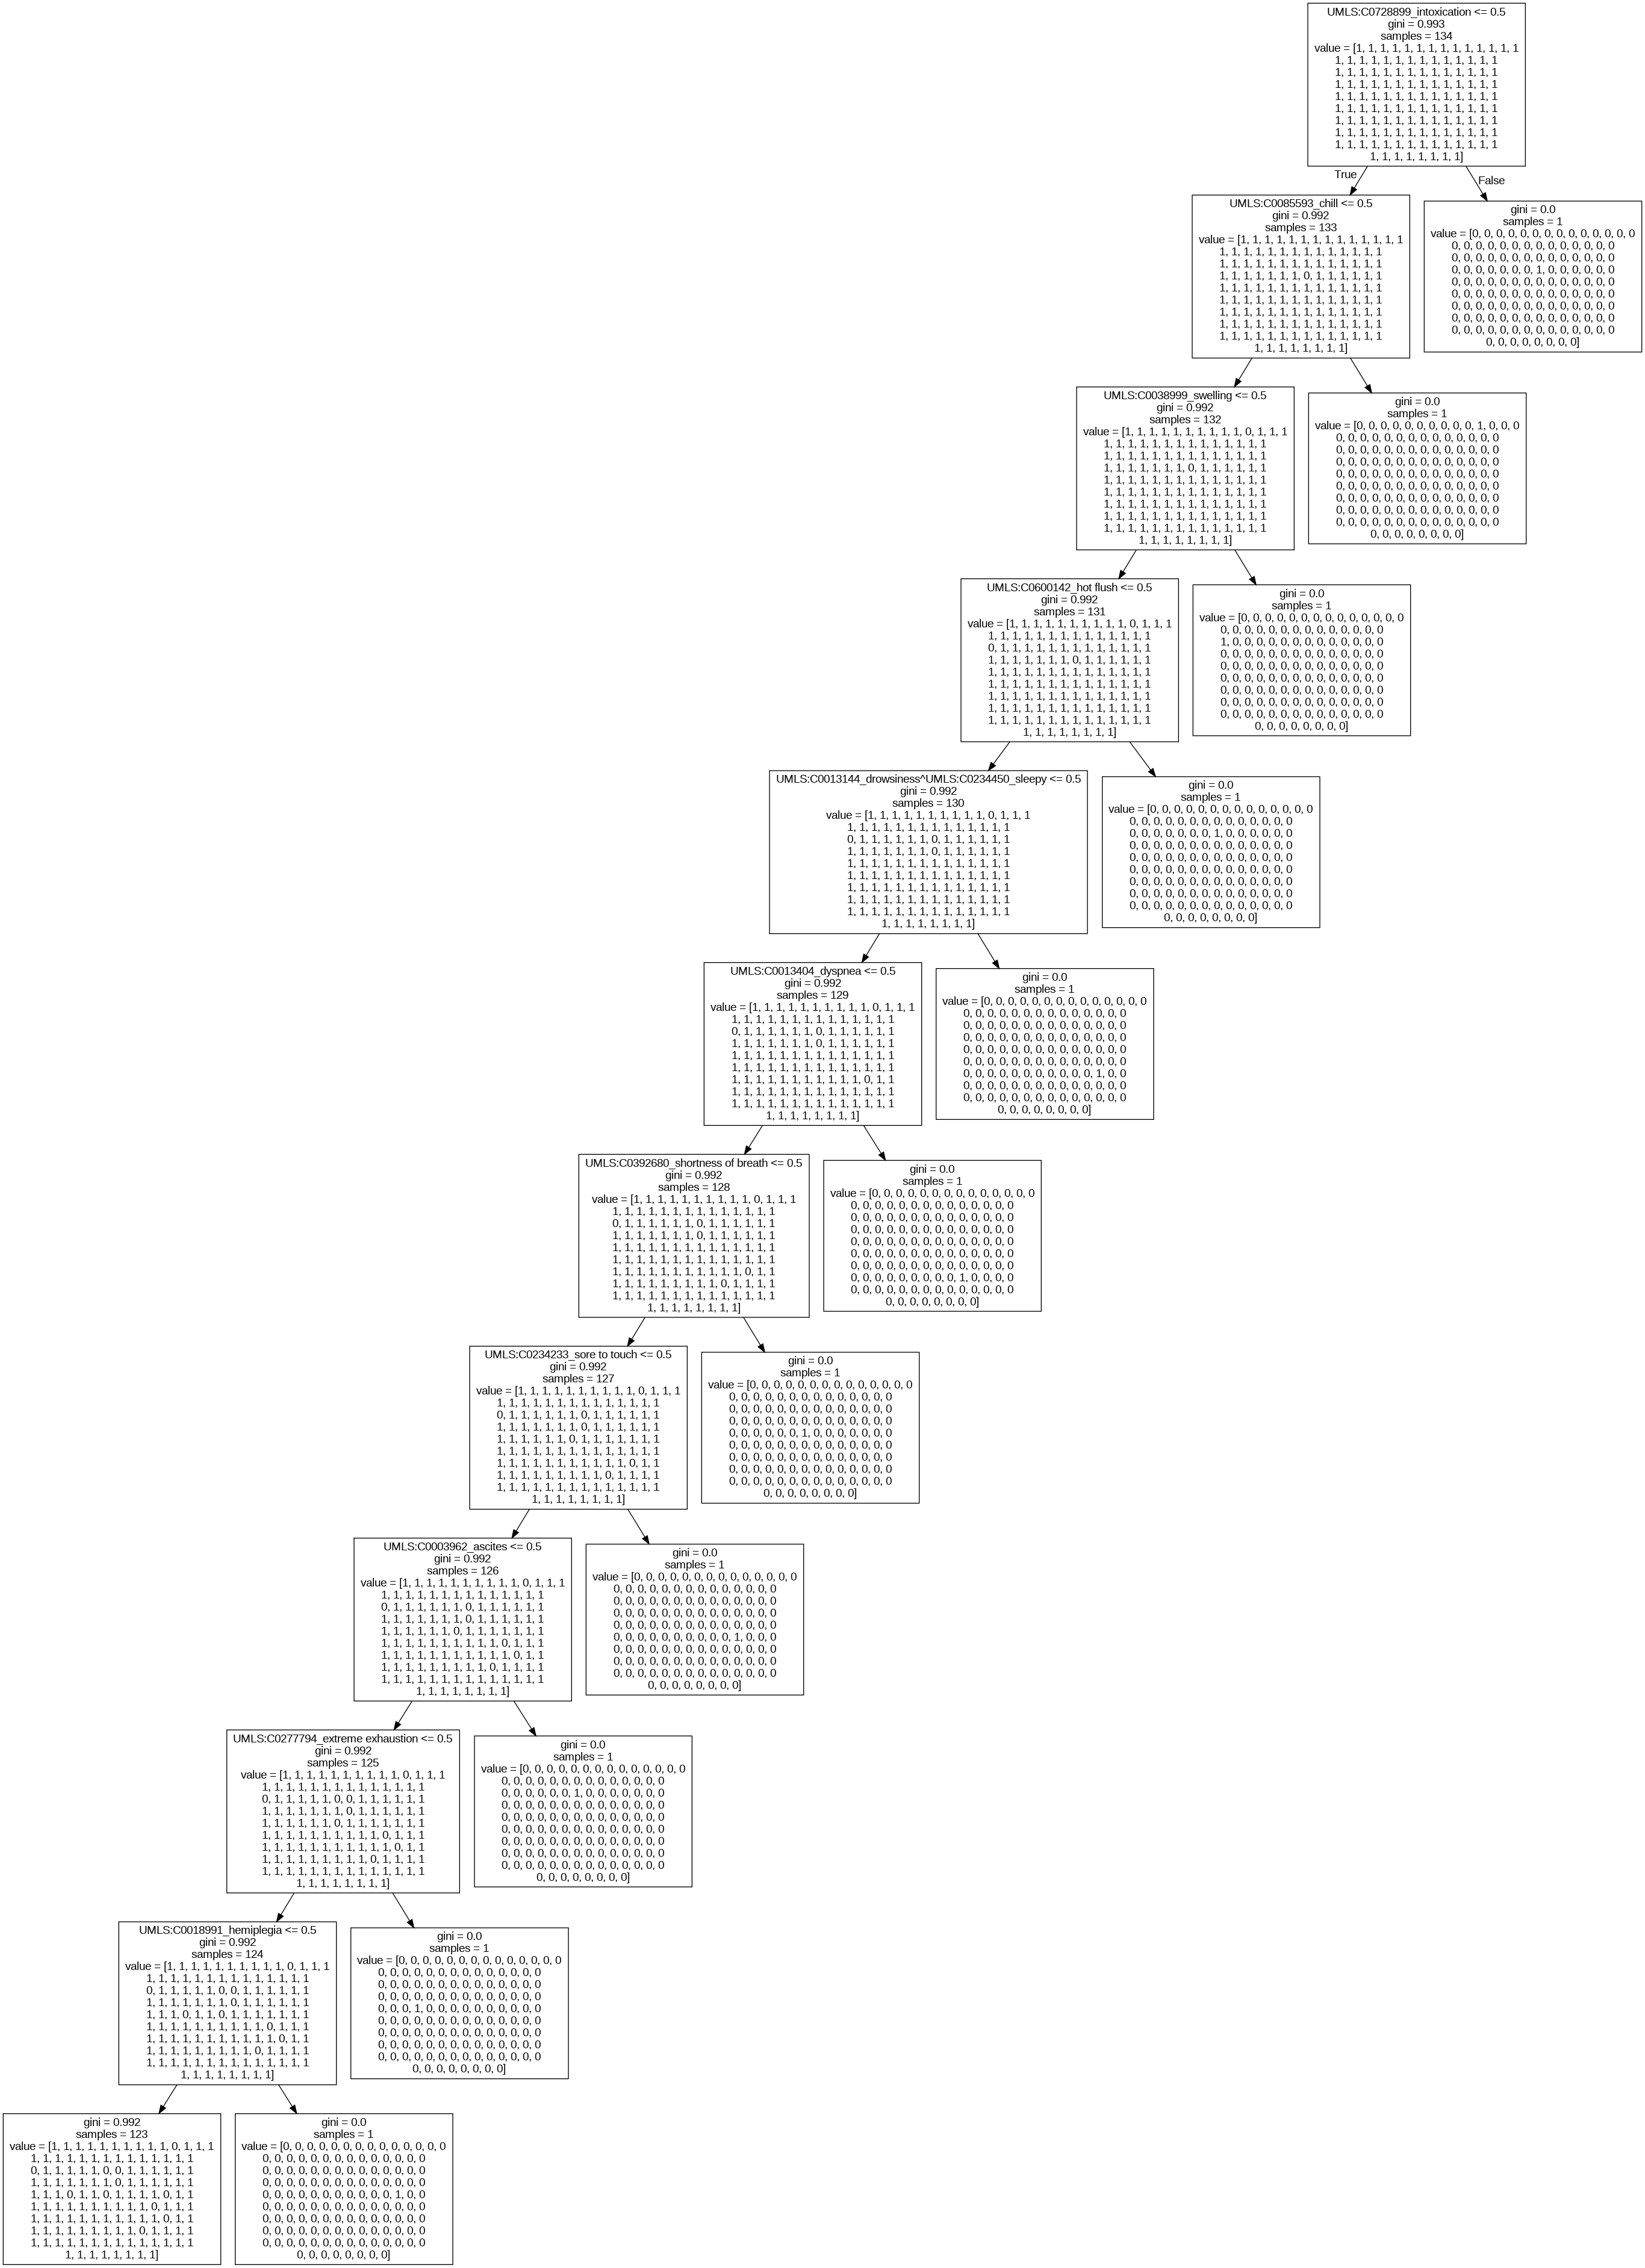

In [45]:
from IPython.display import Image
Image(png_bytes)


In [46]:
disease_pred = clf_dt.predict(X)

In [47]:
disease_real = y.values

In [48]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: UMLS:C0001175_acquired immuno-deficiency syndrome^UMLS:C0019682_HIV^UMLS:C0019693_hiv infections
Actual: UMLS:C0001418_adenocarcinoma

Pred: UMLS:C0001175_acquired immuno-deficiency syndrome^UMLS:C0019682_HIV^UMLS:C0019693_hiv infections
Actual: UMLS:C0001511_adhesion

Pred: UMLS:C0001175_acquired immuno-deficiency syndrome^UMLS:C0019682_HIV^UMLS:C0019693_hiv infections
Actual: UMLS:C0001973_chronic alcoholic intoxication

Pred: UMLS:C0001175_acquired immuno-deficiency syndrome^UMLS:C0019682_HIV^UMLS:C0019693_hiv infections
Actual: UMLS:C0002395_Alzheimer's disease

Pred: UMLS:C0001175_acquired immuno-deficiency syndrome^UMLS:C0019682_HIV^UMLS:C0019693_hiv infections
Actual: UMLS:C0002871_anemia

Pred: UMLS:C0001175_acquired immuno-deficiency syndrome^UMLS:C0019682_HIV^UMLS:C0019693_hiv infections
Actual: UMLS:C0002895_sickle cell anemia

Pred: UMLS:C0001175_acquired immuno-deficiency syndrome^UMLS:C0019682_HIV^UMLS:C0019693_hiv infections
Actual: UMLS:C0003507_stenosis aortic va